In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('./2022.csv').drop('Unnamed: 0', axis=1)
data['Date'] = pd.to_datetime(data['Date'])
group = data.groupby([data['Date'].dt.date])

In [33]:
sentiment = pd.concat([group.mean(), group.count()['Date']], axis=1).rename(columns={'Sentiment': 'avg_polar', 'Date': 'tweet_count'})
sentiment

,avg_polar,tweet_count
Date,,
2022-01-03,0.522727,528
2022-01-04,0.461856,485
2022-01-05,0.524074,540
2022-01-06,0.502137,468
2022-01-07,0.535238,525
...,...,...
2022-10-14,0.479313,1571
2022-10-15,0.385266,828
2022-10-16,0.442224,1151


In [88]:
def cast_float(x):
    first = float(x[0].replace('.', '').replace(',', '.'))
    second = float(x[1].replace('.', '').replace(',', '.'))
    third = float(x[2].replace('.', '').replace(',', '.').replace('%', ''))
    return pd.Series([first, second, third])

In [92]:
stock = pd.read_csv('../StockAndTweetDataExtract/Stock_data/BİST 100 Geçmiş Verileri.csv')
stock['Tarih'] = pd.to_datetime(stock['Tarih'], infer_datetime_format=True)
stock.set_index('Tarih', inplace=True)
stock.drop(['Yüksek', 'Düşük', 'Hac.'], axis=1, inplace=True)
stock = stock.apply(lambda x: cast_float(x), axis=1).rename(columns={0: 'şimdi', 1: 'açılış', 2: 'fark'})
stock

,şimdi,açılış,fark
Tarih,,,
2022-10-19,3880.34,3841.56,1.01
2022-10-18,3841.56,3847.62,-0.16
2022-10-17,3847.62,3641.40,6.08
2022-10-14,3626.96,3584.94,2.07
2022-10-13,3553.43,3529.78,1.01
...,...,...,...
2022-01-07,2033.32,2020.27,1.28
2022-01-06,2007.55,1993.06,0.11
2022-01-05,2005.29,1965.52,2.12


In [93]:
merged = stock.merge(sentiment, right_index=True, left_index=True)
merged

,şimdi,açılış,fark,avg_polar,tweet_count
2022-10-18,3841.56,3847.62,-0.16,0.496745,1997
2022-10-17,3847.62,3641.40,6.08,0.529757,2554
2022-10-14,3626.96,3584.94,2.07,0.479313,1571
2022-10-13,3553.43,3529.78,1.01,0.497640,1907
2022-10-12,3517.75,3576.84,-1.51,0.488859,2244
...,...,...,...,...,...
2022-01-07,2033.32,2020.27,1.28,0.535238,525
2022-01-06,2007.55,1993.06,0.11,0.502137,468
2022-01-05,2005.29,1965.52,2.12,0.524074,540
2022-01-04,1963.59,1941.26,1.92,0.461856,485


<AxesSubplot:>

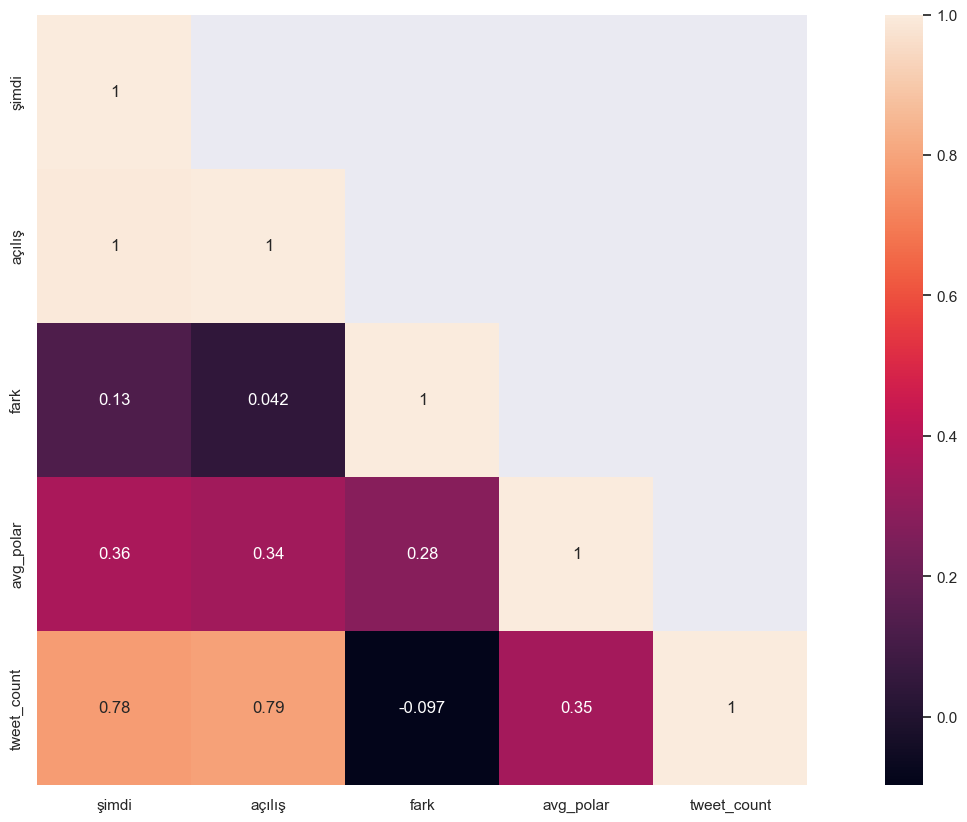

In [95]:
cor_mat= merged.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
sns.set(font_scale=1)
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [96]:
merged.to_csv('2022_final.csv')